In [13]:
import requests
import json
import datetime
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [3]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data


In [4]:
data = load_data('MSFT')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2010-01-04,23.211439,23.323934,22.941451,22.963951,38409100
1,2010-01-05,23.218948,23.323945,22.978959,23.136453,49749600
2,2010-01-06,23.076447,23.308936,22.888955,23.158942,58182400
3,2010-01-07,22.836460,23.023952,22.641469,22.971453,50559700
4,2010-01-08,22.993950,23.158942,22.678964,22.708964,51197400


In [8]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2732, 6)
(1172, 6)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0270713 ],
       [0.02792226],
       [0.02803319],
       ...,
       [0.92775016],
       [0.96574642],
       [0.96678886]])

In [14]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(2632, 100, 1)

In [16]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/opt/anaconda3/envs/Qubot_ML/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0383 - mean_absolute_error: 0.1255
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0040 - mean_absolute_error: 0.0376
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0038 - mean_absolute_error: 0.0378
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0035 - mean_absolute_error: 0.0343
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0025 - mean_absolute_error: 0.0308
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0030 - mean_absolute_error: 0.0324
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0028 - mean_absolute_error: 0.0312
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0029 - mean_absolute_error: 0.0327 
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0028 - mean_absolute_error: 0.0321
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0029 - mean_absolute_error: 0.0310
Epoch 11/100
83/83 ━━━━━━━━━

In [20]:
test_close.shape

(1172, 1)

In [22]:

past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [23]:
final_df.head()

,0
0,185.868604
1,190.266230
2,187.583546
3,193.619546
4,193.150049


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.0138647 ],
       [0.00540682],
       ...,
       [0.99132988],
       [1.        ],
       [0.98556036]])

In [26]:
input_data.shape

(1272, 1)

In [27]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1172, 100, 1)
(1172,)


In [29]:
y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step 


In [31]:

y_pred.shape

(1172, 1)

In [32]:
scaler.scale_

array([0.00315277])

In [33]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

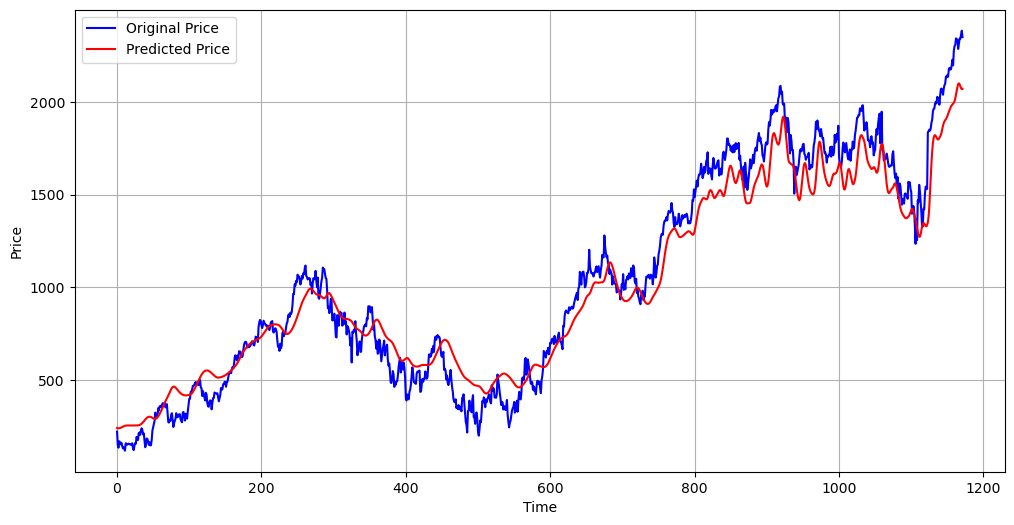

In [34]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.84%


In [36]:

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9479591575954395


In [37]:
import pickle 

In [39]:
model.save('lstm_model.h5')